#Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb_stocks = pd.read_csv('/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
earthquakes = pd.read_csv('/content/earthquakes.csv')

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

In [26]:
fb_stocks['close'].rolling('20D').min()

date
2018-01-02    181.42
2018-01-03    181.42
2018-01-04    181.42
2018-01-05    181.42
2018-01-08    181.42
               ...  
2018-12-24    124.06
2018-12-26    124.06
2018-12-27    124.06
2018-12-28    124.06
2018-12-31    124.06
Name: close, Length: 251, dtype: float64

Text(0.5, 0.98, 'FB Closing Price')

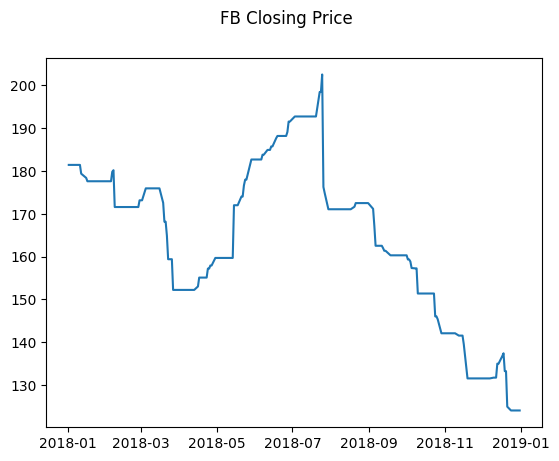

In [28]:
plt.plot(fb_stocks['close'].rolling('20D').min())
plt.suptitle('FB Closing Price')

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.


Text(0.5, 1.0, 'change of fb column and fb close')

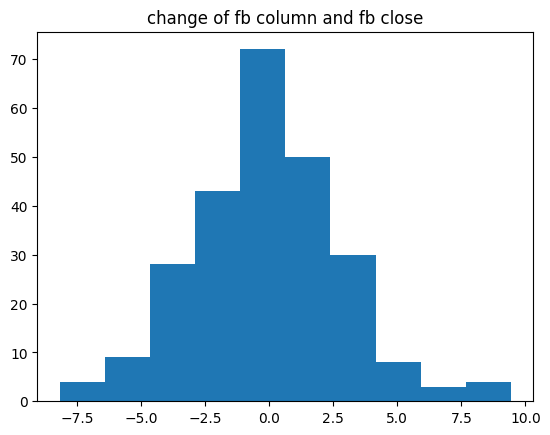

In [32]:
#Histogram
fb_histdiff = fb_stocks['open'] - fb_stocks['close']
plt.hist(fb_histdiff)
plt.title('change of fb column and fb close')

Text(0.5, 1.0, 'change of fb column and fb close')

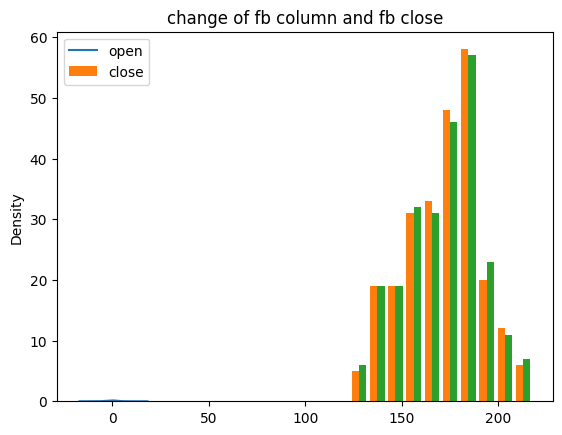

In [35]:
#KDE
fb_histdiff.plot(kind='kde')
plt.title('change of fb column and fb close')

plt.hist([fb_stocks['open'],fb_stocks['close']])
plt.legend(['open','close'])
plt.title('change of fb column and fb close')

Text(0.5, 1.0, 'change of fb column and fb close')

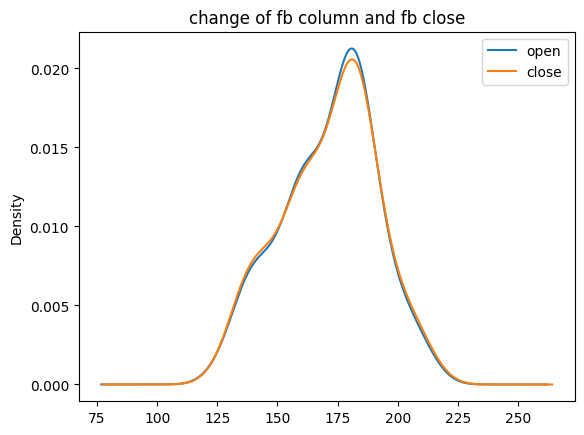

In [36]:
fb_stocks.plot(y=['open','close'],kind='kde')
plt.title('change of fb column and fb close')

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

Text(0.5, 1.0, 'Indonesia eq magnitude per magType')

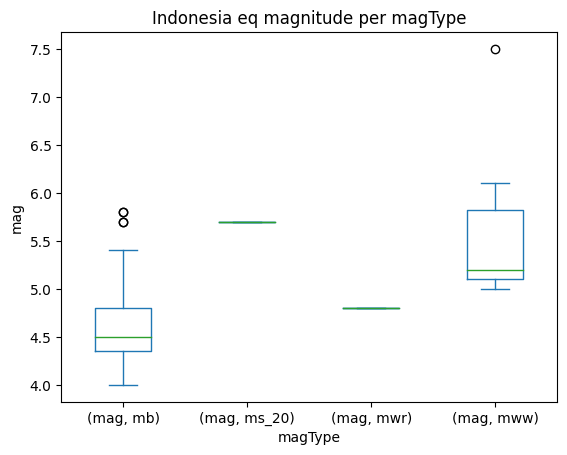

In [31]:
eq_indonesia = earthquakes.query("parsed_place == 'Indonesia'")
eq_indonesia = eq_indonesia[['mag','magType']]
eq_indonesia = eq_indonesia.pivot(columns = 'magType')

eq_indonesia.plot(kind = 'box')
plt.xlabel('magType')
plt.ylabel('mag')
plt.title('Indonesia eq magnitude per magType' )

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.



Text(0.5, 1.0, 'difference between high and low value of fb stocks')

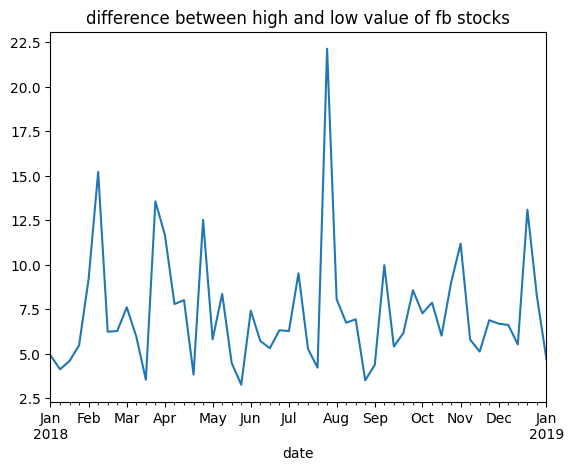

In [30]:
fb_weekly = fb_stocks.resample('W').agg({
'high':'max',
'low':'mean'
})

fb_weekly['difference'] = fb_weekly['high'] - fb_weekly['low']

fb_weekly['difference'].plot()
plt.title('difference between high and low value of fb stocks')

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

* The first subplot will contain a line plot of the daily difference between * that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

* The second subplot will be a bar plot showing the net effect this had monthly, using resample().

* Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

* Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [39]:
diff_stocks = fb_stocks['open'] - fb_stocks['close']
diff_stocks

date
2018-01-02   -3.74
2018-01-03   -2.79
2018-01-04    0.57
2018-01-05   -1.26
2018-01-08   -1.08
              ... 
2018-12-24   -0.96
2018-12-26   -8.18
2018-12-27   -2.08
2018-12-28    2.14
2018-12-31    3.36
Length: 251, dtype: float64

In [40]:
netEff = diff_stocks.resample('M').sum()
netEff

date
2018-01-31   -12.5600
2018-02-28     8.5900
2018-03-31    -0.8400
2018-04-30     7.4147
2018-05-31   -22.4288
2018-06-30    -6.1646
2018-07-31   -13.3350
2018-08-31     2.4492
2018-09-30    -2.7450
2018-10-31    15.7650
2018-11-30     2.6700
2018-12-31     7.0000
Freq: M, dtype: float64

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

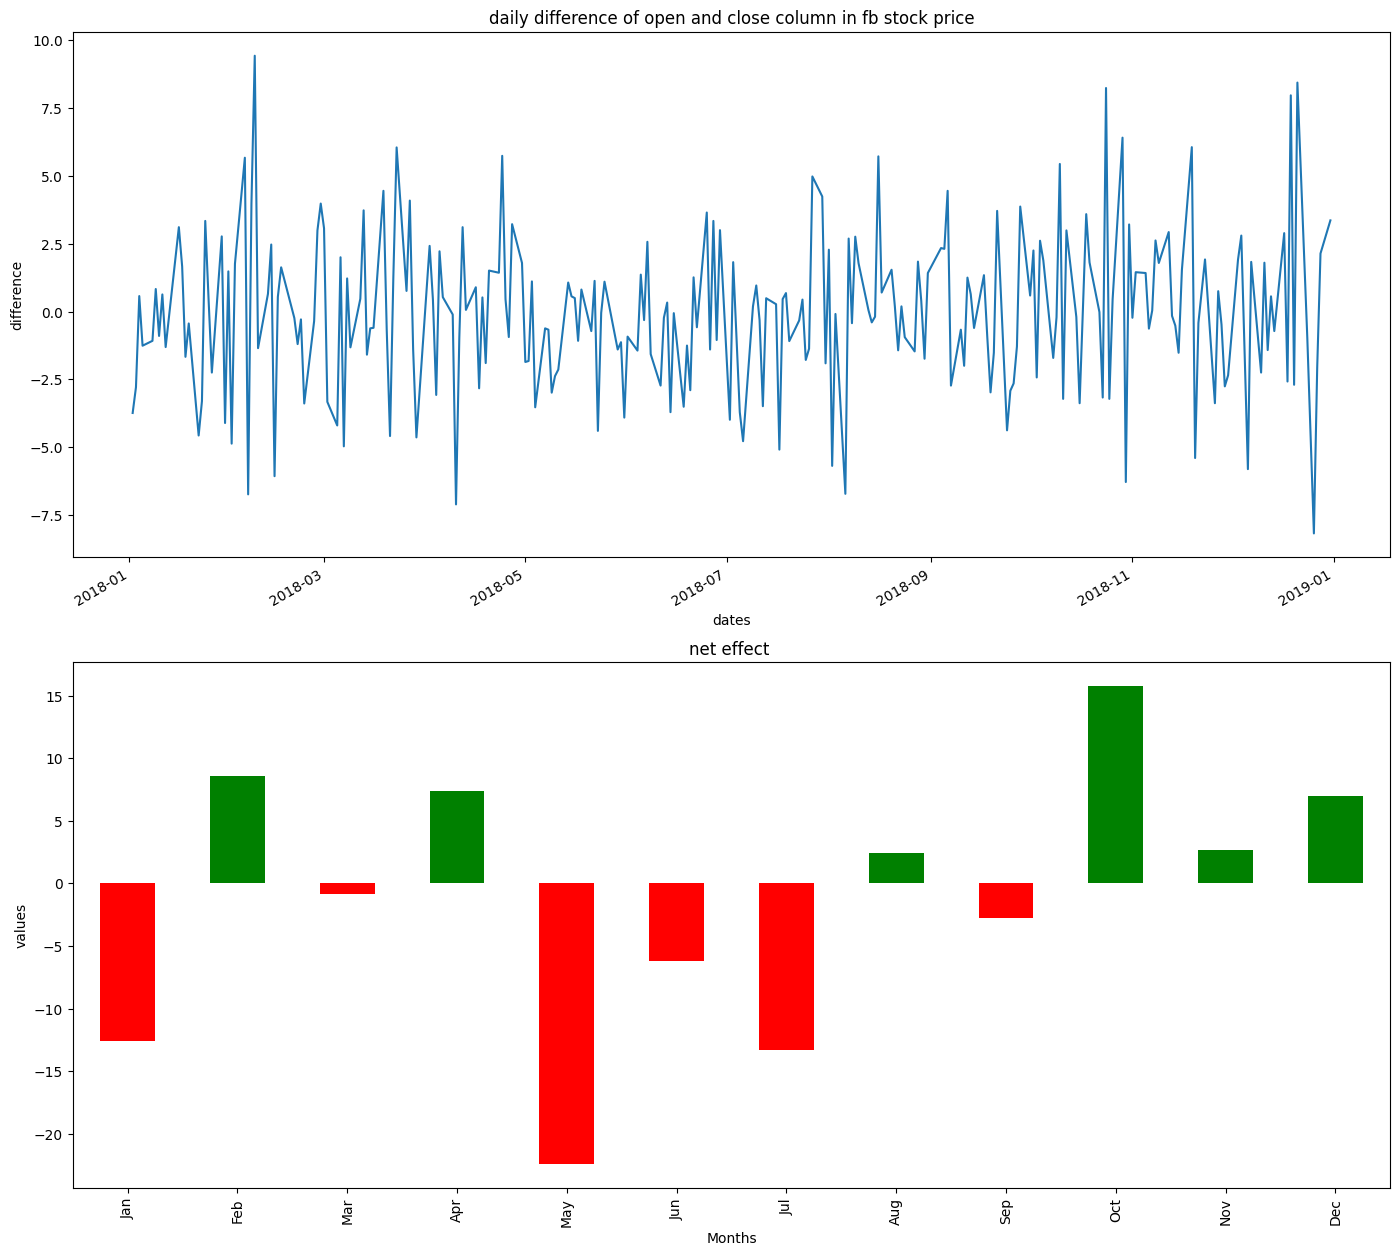

In [41]:
fig,ax = plt.subplots(2,1,figsize=(17,17))

diff_stocks.plot(ax = ax[0])
ax[0].set_title('daily difference of open and close column in fb stock price')
ax[0].set_ylabel('difference')
ax[0].set_xlabel('dates')

color = ['red','green','red','green','red','red','red','green','red','green','green','green']
netEff.plot(kind='bar',ax = ax[1],color = color)
ax[1].set_title('net effect ')
ax[1].set_xlabel('Months')
ax[1].set_ylabel('values')
ax[1].set_xticklabels(netEff.index.strftime('%b')) # renaming the x axis with the first 3 letters of every month

#Conclusion

In doing this activity, I learned that subplots provides a way to plot multiple plots on a single figure. Given the number of rows and columns , it returns a tuple ( fig , ax ), giving a single figure fig with an array of axes ax. Furthermore, we can customize our plots in the graph to make it visually appealing to the audience. Moreover, I learned as well that KDE is useful when dealing with continuous data or when you want to explore if your date follows a normal distribution.